# Exploration et Nettoyage de la Table `title.principals`

## Analyse globale de la table

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Importation du DataSet :
df_title_principals = pd.read_csv('../gitignore/title.principals.tsv', sep= '\t')

In [3]:
df_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89216353 entries, 0 to 89216352
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 4.0+ GB


In [4]:
df_title_principals.describe()

,ordering
count,8.921635e+07
mean,7.005962e+00
std,5.152561e+00
min,1.000000e+00
25%,3.000000e+00
50%,6.000000e+00
75%,1.000000e+01
max,7.500000e+01


In [5]:
df_title_principals.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N


## Analyse exploratoire de la Table `title.principals`

### Analyse exploratoire :
#### Vérifications de base :
- **Taille de la table** : **89 216 353** lignes  et **6** colonnes.

- **Types de données** : Une colonne entière : **ordering (int64)**
, Cinq colonnes objets : **tconst, nconst, category, job, characters**

- **Valeurs manquantes (Valeur '\N')** : Valeurs manquantes dans 'job' : **72515501 (81.28%)** / Valeurs manquantes dans 'characters' : **45987058 (51.55%)**
  - ***Colonne 'job'*** : Avec 81% de données manquantes, pas utile pour toutes les analyses. voir pour statut **optionnel**
  - ***Colonne 'Character'***: plus complète (>50% de valeurs renseignées). **Pertinente** pour l'analyse des personnages et rôles.

In [6]:
# Taille de la Table
df_title_principals.dtypes

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object

### Suppression de la colonne 'ordering' inutilisée

In [7]:
# Suppression de la colonne 'ordering' :
df_title_principals = df_title_principals.drop(columns = 'ordering')

### Normalisation des valeurs manquantes '/N' dans 'job' et 'characters'

- **Remplacement des valeurs '\N'** dans `job` et `characters` par des valeurs nulles ou une chaîne vide pour faciliter l’analyse.

In [8]:
# Valeurs manquantes : Analyse des colonnes 'jobs' et 'characters' (qui contiennent des valeurs '\N')
manquant_job = (df_title_principals['job'] == '\\N').sum()
manquant_character = (df_title_principals['characters'] == '\\N').sum()

# Proportions de valeurs manquantes
total_lignes = len(df_title_principals)
pourcentage_manquant_job = (manquant_job / total_lignes) * 100
pourcentage_manquant_character = (manquant_character / total_lignes) * 100

print(f"Valeurs manquantes dans 'job' : {manquant_job} ({pourcentage_manquant_job:.2f}%)")
print(f"Valeurs manquantes dans 'characters' : {manquant_character} ({pourcentage_manquant_character:.2f}%)")

Valeurs manquantes dans 'job' : 72515501 (81.28%)
Valeurs manquantes dans 'characters' : 45987058 (51.55%)


In [9]:
# Remplacement des valeurs manquantes > colonne 'job' :
df_title_principals['job'] = df_title_principals['job'].replace('\\N', pd.NA)

In [10]:
# Remplacement des valeurs manquantes > colonne 'characters' :
df_title_principals['characters'] = df_title_principals['characters'].replace('\\N', pd.NA)

In [11]:
df_title_principals.head()

,tconst,nconst,category,job,characters
0,tt0000001,nm1588970,self,<NA>,"[""Self""]"
1,tt0000001,nm0005690,director,<NA>,<NA>
2,tt0000001,nm0005690,producer,producer,<NA>
3,tt0000001,nm0374658,cinematographer,director of photography,<NA>
4,tt0000002,nm0721526,director,<NA>,<NA>


#### Statistiques descriptives :
- **Distribution des catégories (`category`)** : Identification des rôles les plus fréquents (acteur, réalisateur, etc.).

     - **Actor et Actress** : Utilisables pour identifier les acteurs / actrices = **essentielles pour le moteur de recherche**
     - **Director** : Permet aux utilisateurs de rechercher des films en fonction du réalisateur = **essentiel pour le moteur de recherche**
     - **Self** : correspond aux personnes apparaissant en tant qu'elles-mêmes, souvent dans les documentaires = **utile pour le moteur de recherche**
     - **writer** : scénariste = **utile pour les infos films**
     - **director** : Réalisateur = **utile pour les infos films**
     - **Producer** : Producteur = **utile pour les infos films**

- **Analyse des personnages (`characters`)** : Extraction des personnages les plus populaires ou récurrents.

- **Vérification de la diversité des postes (`job`)** : Analyse textuelle pour regrouper les titres similaires.

### Synthèse de l'analyse de la table `title.principals` :

La table `title.principals` sert de lien entre les films (via `tconst`) et les personnes (via `nconst`) qui ont participé à leur production ou à leur distribution. Elle permet d'explorer les catégories de travail (acteurs, réalisateurs, producteurs, etc.) et les rôles spécifiques joués par chaque personne.

| **Colonne**   | **Type**   | **Description**                                                             | **Conservation** |
|---------------|------------|-----------------------------------------------------------------------------|------------------|
| `tconst`      | string     | Identifiant unique alphanumérique du titre (film ou série).                 | Oui              |
| `ordering`    | integer    | Numéro unique pour différencier les lignes pour un titre donné.             | Non              |
| `nconst`      | string     | Identifiant unique alphanumérique de la personne.                          | Oui              |
| `category`    | string     | Catégorie de travail de la personne pour le titre (acteur, réalisateur…).  | Oui              |
| `job`         | string     | Titre précis du poste occupé si renseigné (sinon '\N').                   | Oui              |
| `characters`  | string     | Nom du personnage joué si renseigné (sinon '\N').                         | Oui              |

---

### Utilisation prévue :
Cette table est essentielle pour :
- Identifier les contributions des individus dans des projets spécifiques.
- Étudier les relations entre titres, professions, et personnages.
- Créer des rapports sur les acteurs les plus populaires ou les réalisateurs les plus prolifiques.

---

### Résumé des transformations et choix de colonnes :
#### Colonnes conservées :
- `tconst` : Nécessaire pour le lien avec d'autres tables liées aux films.
- `nconst` : Permet d’identifier les personnes dans la base de données.
- `category` : Crucial pour connaître le rôle professionnel de chaque personne.
- `job` : Fournit un niveau de détail supplémentaire sur le poste occupé.
- `characters` : Important pour des analyses sur les rôles joués par les acteurs.

#### Colonnes non conservées :
- `ordering` : Redondant pour cette analyse et peu utile en pratique.

---

## Nettoyage de la Table `title.principals`

### Colonne des catégories (`category`)

In [12]:
# Distribution des Catégories
distribution_categories = df_title_principals['category'].value_counts()
print(distribution_categories)

category
actor                  21335705
actress                15996680
self                   12816065
writer                 10738282
director                7697978
producer                6743121
editor                  4708732
cinematographer         3594914
composer                2910416
production_designer     1078929
casting_director        1049804
archive_footage          536848
archive_sound              8879
Name: count, dtype: int64


**Arbitrage** Pour alléger la base de données : Nous conservons 'actor', 'actress', 'self', 'writer', director' et supprimons les autres catégories.

In [13]:
# Suppression des valeurs inutilisées dans 'category'
categories_a_supprimer = ['editor', 'cinematographer', 'composer', 'production_designer', 'casting_director', 'archive_footage', 'archive_sound']
df_title_principals = df_title_principals[~df_title_principals['category'].isin(categories_a_supprimer)]

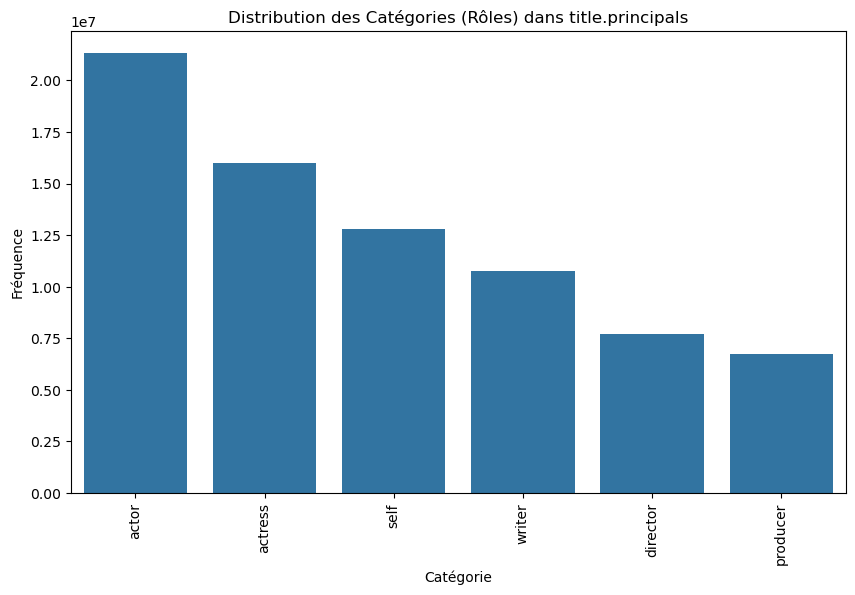

In [14]:
# Visualisation de la distribution des Catégories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_title_principals, x='category', order=df_title_principals['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution des Catégories (Rôles) dans title.principals')
plt.xlabel('Catégorie')
plt.ylabel('Fréquence')
plt.show()

In [15]:
df_title_principals['category'].value_counts()

category
actor       21335705
actress     15996680
self        12816065
writer      10738282
director     7697978
producer     6743121
Name: count, dtype: int64

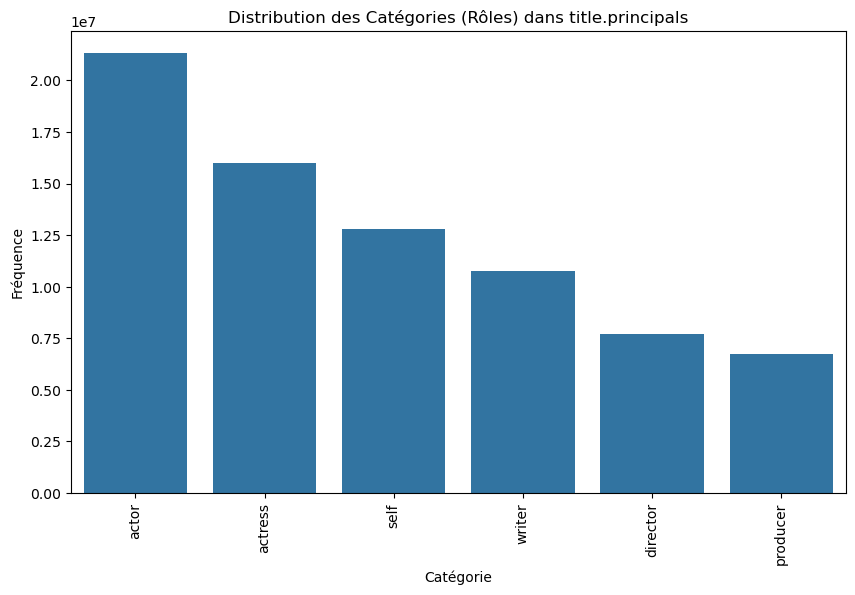

In [16]:
# Visualisation de la distribution des Catégories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_title_principals, x='category', order=df_title_principals['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution des Catégories (Rôles) dans title.principals')
plt.xlabel('Catégorie')
plt.ylabel('Fréquence')
plt.show()

In [17]:
df_title_principals = df_title_principals.reset_index(drop=True)

In [18]:
df_title_principals['category'].value_counts()

category
actor       21335705
actress     15996680
self        12816065
writer      10738282
director     7697978
producer     6743121
Name: count, dtype: int64

- Création d'un dataframe avec uniquement Acteurs / Actrices / Self

In [19]:
# Filtrer les lignes où 'category' est 'actor', 'actress' ou 'self'
df_acteurs = df_title_principals[df_title_principals['category'].isin(['actor', 'actress', 'self'])]

In [20]:
# Normaliser l'affichage de la colonne 'characters'
# Supprimer les crochets et les guillemets de la colonne
df_acteurs['characters'] = df_acteurs['characters'].str.replace(r'[\[\]"]', '', regex=True)
df_acteurs.sample(10)

C:\Users\jpvt\AppData\Local\Temp\ipykernel_16240\3237406497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acteurs['characters'] = df_acteurs['characters'].str.replace(r'[\[\]"]', '', regex=True)


,tconst,nconst,category,job,characters
26715570,tt1486649,nm3560379,actress,<NA>,Barbara
49739327,tt30474198,nm15609490,actress,<NA>,<NA>
14573868,tt11257350,nm4250596,actress,<NA>,Mehtap
54060294,tt33372021,nm15528898,actor,<NA>,Shruthi
55228983,tt34557855,nm4970831,actress,<NA>,<NA>
66941268,tt7443728,nm1214700,actress,<NA>,Marina Hernández
46659278,tt28479891,nm0729592,actor,<NA>,<NA>
67635553,tt7674628,nm1958346,actor,<NA>,Aleksei
37871124,tt21409976,nm6550878,self,<NA>,Self
14589720,tt11261080,nm11121521,actress,<NA>,Mother


In [21]:
df_acteurs = df_acteurs.reset_index(drop=True)

In [22]:
df_acteurs.sample(10)

,tconst,nconst,category,job,characters
30223079,tt28021026,nm5156947,actress,<NA>,<NA>
37130400,tt3543504,nm6299232,actor,<NA>,<NA>
3758339,tt0575703,nm0358460,actor,<NA>,Dad
34029175,tt3165012,nm0625529,actress,<NA>,Karen Vick
32867786,tt3037206,nm2408329,self,<NA>,Self
923658,tt0110075,nm0503292,actor,<NA>,Ruudi
41161401,tt5657754,nm0137390,actor,<NA>,Narrator
37841202,tt3905330,nm1846933,actress,<NA>,<NA>
47329399,tt8603930,nm0157385,actress,<NA>,Nobita's Mom (1979-2005)
35085888,tt32543902,nm14474015,actor,<NA>,<NA>


In [23]:
df_acteurs[df_acteurs['tconst'].duplicated(keep=False)]

,tconst,nconst,category,job,characters
1,tt0000005,nm0443482,actor,<NA>,Blacksmith
2,tt0000005,nm0653042,actor,<NA>,Assistant
3,tt0000007,nm0179163,actor,<NA>,<NA>
4,tt0000007,nm0183947,actor,<NA>,<NA>
6,tt0000009,nm0063086,actress,<NA>,Miss Geraldine Holbrook (Miss Jerry)
...,...,...,...,...,...
50148445,tt9916880,nm2676923,actress,<NA>,Sour Susan
50148446,tt9916880,nm2676923,actress,<NA>,Goody-Goody Gordon
50148447,tt9916880,nm2676923,actress,<NA>,Singing Soraya
50148448,tt9916880,nm1469295,actress,<NA>,Perfect Peter


In [25]:
df_acteurs = df_acteurs.drop(columns=['job'])

In [35]:
df_acteurs.sample(10)

,tconst,nconst,category,rôle
45881201,tt7938942,nm0142389,actress,Angela Falla
16822128,tt14401260,nm1422099,actress,<NA>
49922053,tt9802428,nm10069795,actor,Jack
26342291,tt22807840,nm2406271,soi-même,Self
20636055,tt16444882,nm0372718,soi-même,Self - Presenter
24178493,tt20765682,nm2178631,soi-même,Self
20826837,tt1663599,nm3926288,soi-même,Self
44887136,tt7444886,nm9319236,soi-même,Self
22714394,tt18933230,nm8258019,actor,Choi Woo Hyuk
38989410,tt4509208,nm4361152,actor,Quinn


In [ ]:
# Renommer la colonne Characters
df_acteurs = df_acteurs.rename(columns={'characters': 'rôle'})

In [ ]:
# Conserver 'Self' et enlever tout ce qui suit dans la colonne 'category'
df_acteurs['rôle'] = df_acteurs['rôle'].replace(r'^Self.*', 'Self', regex=True)

In [38]:
# Remplacer Self par Soi-même dans rôles
df_acteurs['rôle'] = df_acteurs['rôle'].replace('Self', 'soi-même')

In [40]:
df_acteurs.sample(10)

,tconst,nconst,category,rôle
43323936,tt6699116,nm2291777,soi-même,soi-même
23117916,tt19414336,nm0103522,soi-même,soi-même
39040181,tt4535932,nm1801973,actress,Kinga Zukowska
48031155,tt8912794,nm1441419,actress,Marta Gutierrez
13251903,tt12673738,nm5246787,actor,<NA>
47310859,tt8596620,nm0291940,actress,Clarice Ribeiro
17798523,tt14840216,nm3045633,soi-même,soi-même
20578297,tt16416716,nm4159450,actor,Dad
3789910,tt0579404,nm0141581,actress,Carlotta Beck
23726440,tt20198262,nm7999005,actor,Anthony Zulueta


#### Export de la table des acteurs

# J'en suis là

In [41]:
# Export Table Acteurs
df_acteurs.to_csv('../gitignore/info_casting_acteurs.tsv', sep='\t', index=False)

In [1]:
import pandas as pd
# Import Point d'Etape
df_title_principals = pd.read_csv('../gitignore/title.principals.tsv', sep= '\t')

**A FAIRE** : 

title.principals : UNIQUEMENT pour l’info
on a déjà fait la sélection sur les acteurs, director, self, writers, producteurs → une seule ligne par films avec une colonne : 
- 1 colonne avec les acteurs, actrices, self, 
- 1 colonne directors, 
- 1 colonne writers,
- 1 colonne producteurs,
- editor, cinematographer, composer : viré.

### Colonne des personnages (`characters`)

**Arbitrage** : Nous devons donc **exploser** la colonne 'characters'

In [17]:
import ast

# Utilisation d'ast.literal_eval pour convertir les chaînes représentant des listes en objets réels
df_title_principals['characters'] = df_title_principals['characters'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

In [18]:
# explode de la colonne 'characters'
df_exploded = df_title_principals.explode('characters', ignore_index=True)

# Vérification après explosion :
print(df_exploded.sample(10))

# Comparatif Avant / Après explosion du nombre de lignes :
print(f"Nombre de lignes avant explosion : {len(df_title_principals)}")
print(f"Nombre de lignes après explosion : {len(df_exploded)}")

MemoryError: Unable to allocate 575. MiB for an array with shape (1, 75327836) and data type object

In [ ]:
# Uniformisation des valeurs "Self - etc." en "Self'
df_exploded['characters'] = df_exploded['characters'].str.replace(r'Self.*', 'Self', regex=True)

In [ ]:
# export de 'title.principals_final.tsv' :
# df_exploded.to_csv('../gitignore/title.principals_final.tsv', sep='\t', index=False)

### Recommandations pour l’intégration :

1. Joindre avec `name.basics` via `nconst` pour enrichir les données avec les noms et professions principales.
2. Joindre avec `title.basics` via `tconst` pour associer les informations sur les titres (genre, année, etc.).